In [2]:
import pandas as pd
from IPython.display import display
import graphviz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

,Unnamed: 0,counter,src_svc,dst_svc,src_cid,dst_cid,flow,total,weight
77,0,6,SOURCE,metrics-fake-ingress,XXXX,us-central-1,57,796.0,0.071608
78,1,6,SOURCE,metrics-fake-ingress,XXXX,us-east-1,56,57.0,0.982456
79,2,6,SOURCE,metrics-fake-ingress,XXXX,us-south-1,333,56.0,5.946429
80,3,6,SOURCE,metrics-fake-ingress,XXXX,us-west-1,350,333.0,1.051051
81,4,6,metrics-fake-ingress,metrics-handler,us-central-1,us-central-1,57,350.0,0.162857
82,5,6,metrics-fake-ingress,metrics-handler,us-east-1,us-east-1,56,215.0,0.260465
83,6,6,metrics-fake-ingress,metrics-handler,us-south-1,us-central-1,118,166.0,0.710843
84,7,6,metrics-fake-ingress,metrics-handler,us-south-1,us-south-1,215,215.0,1.000000
85,8,6,metrics-fake-ingress,metrics-handler,us-west-1,us-central-1,40,200.0,0.200000
86,9,6,metrics-fake-ingress,metrics-handler,us-west-1,us-east-1,110,215.0,0.511628


,counter,src_svc,dst_svc,src_cid,dst_cid,flow,total,weight
0,6,SOURCE,metrics-fake-ingress,XXXX,us-central-1,57,796.0,0.071608
1,6,SOURCE,metrics-fake-ingress,XXXX,us-east-1,56,57.0,0.982456
2,6,SOURCE,metrics-fake-ingress,XXXX,us-south-1,333,56.0,5.946429
3,6,SOURCE,metrics-fake-ingress,XXXX,us-west-1,350,333.0,1.051051
4,6,metrics-fake-ingress,metrics-handler,us-central-1,us-central-1,57,350.0,0.162857
5,6,metrics-fake-ingress,metrics-handler,us-east-1,us-east-1,56,215.0,0.260465
6,6,metrics-fake-ingress,metrics-handler,us-south-1,us-central-1,118,166.0,0.710843
7,6,metrics-fake-ingress,metrics-handler,us-south-1,us-south-1,215,215.0,1.000000
8,6,metrics-fake-ingress,metrics-handler,us-west-1,us-central-1,40,200.0,0.200000
9,6,metrics-fake-ingress,metrics-handler,us-west-1,us-east-1,110,215.0,0.511628


us-central-1
us-east-1
us-south-1
us-south-1
us-west-1
us-west-1
us-west-1
us-central-1
us-east-1
us-south-1
us-west-1
us-central-1
us-east-1
us-south-1
us-west-1


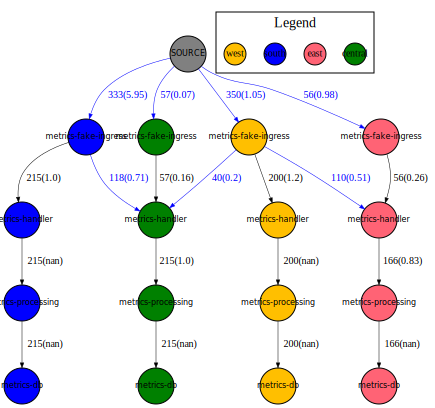

In [4]:
# input_routing_rule_fn = '/users/gangmuk/projects/slate-benchmark/metrics-microservice-app/runtime-test/w350c50s350e50/WATERFALL-routing_history.csv'
input_routing_rule_fn = 'metrics-microservice-app/runtime-test/w350c50s350e50/WATERFALL-routing_history.csv'
counter = 6
df = pd.read_csv(input_routing_rule_fn)
df = df[df['counter']==counter]
display(df)
grouped_df = df.groupby(['counter','src_svc', 'dst_svc', 'src_cid', 'dst_cid']).agg({'flow': 'sum', 'total': 'max'}).reset_index()
grouped_df['weight'] = grouped_df['flow']/grouped_df['total']
display(grouped_df)

node_color_dict = dict()
node_color_dict["XXXX"] = "gray"
node_color_dict['-1'] = "#FFBF00"
node_color_dict['us-west-1'] = "#FFBF00"
node_color_dict['us-east-1'] = "#ff6375"
node_color_dict['us-south-1'] = "blue"
node_color_dict['us-central-1'] = "green"

g_ = graphviz.Digraph()
# plot_dict_wo_compute_edge(network_arc, g_)
node_pw = "1"
edge_pw = "0.5"
fs = "8"
edge_fs = "10"
fn="times bold italic"
edge_arrowsize="0.5"
edge_minlen="1"
cluster_list = list()
for index, row in df.iterrows():
    if row["flow"] <= 0 or row["weight"] <= 0:
        continue
    src_cid = row["src_cid"]
    dst_cid = row["dst_cid"]
    src_svc = row["src_svc"]
    dst_svc = row["dst_svc"]
    cluster_list.append(src_cid)
    if src_cid == dst_cid:
        edge_color = 'black'
    else:
        edge_color = 'blue'
    edge_style = 'filled'
    src_node_color = node_color_dict[src_cid]
    dst_node_color = node_color_dict[dst_cid]
    src_node_name = src_svc+str(src_cid)+str(src_cid)
    dst_node_name = dst_svc+str(dst_cid)+str(dst_cid)
    src_node_label = src_svc
    dst_node_label = dst_svc
    # src_node
    g_.node(name=src_node_name, label=src_node_label, shape='circle', style='filled', fillcolor=src_node_color, penwidth=node_pw, fontsize=fs, fontname=fn, fixedsize="True", width="0.5")
    # dst_node
    g_.node(name=dst_node_name, label=dst_node_label, shape='circle', style='filled', fillcolor=dst_node_color, penwidth=node_pw, fontsize=fs, fontname=fn, fixedsize="True", width="0.5")
    # edge from src_node to dst_node        
    g_.edge(src_node_name, dst_node_name, label=f'{round(row["flow"],1)}({round(row["weight"], 2)})', penwidth=edge_pw, style=edge_style, fontsize=edge_fs, fontcolor=edge_color, color=edge_color, arrowsize=edge_arrowsize, minlen=edge_minlen)
    
# Adding a legend
with g_.subgraph(name='cluster_legend') as c:
    c.attr(label='Legend')
    legend_fontsize='10'
    for cluster in cluster_list:
        if cluster == "XXXX":
            continue
        print(cluster)
        c.node(cluster, label=cluster.split('-')[1], shape='circle', style='filled', fillcolor=node_color_dict[cluster], fontsize=legend_fontsize, fixedsize='true', width='0.3', height='0.3')

g_.render('/users/gangmuk/projects/slate-benchmark/metrics-microservice-app/runtime-test/w300c50s300e50/graphviz')
g_
